In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("Preprocessed_Telco_Churn.csv")
print("✅ Dataset Loaded:", df.shape)
df.head()

✅ Dataset Loaded: (7043, 26)


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Column1,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277445,0,No phone service,No,Yes,No,...,0,NaN,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0.066327,1,No,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,-1.236724,1,No,Yes,Yes,No,...,1,NaN,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0.514251,0,No phone service,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,-1.236724,1,No,No,No,No,...,1,NaN,False,True,False,False,False,False,True,False


In [4]:
# Check contract column presence
contract_cols = [c for c in df.columns if "Contract" in c]
print("Contract-related columns:", contract_cols)

if 'Contract_Two year' in df.columns or 'Contract_One year' in df.columns:
    contract_churn = df.groupby('Churn')[contract_cols].mean().T * 100
    print("\nChurn % by contract type:")
    print(contract_churn)


Contract-related columns: ['Contract_One year', 'Contract_Two year']

Churn % by contract type:
Churn                      0         1
Contract_One year  25.260920  8.881755
Contract_Two year  31.832238  2.568218


In [9]:
segment_churn = df.groupby(['TenureSegment','ChargeSegment'], observed=True)['Churn'].mean().unstack() * 100
print("Churn Rate (%) by Segment:")
print(segment_churn.round(2))

Churn Rate (%) by Segment:
ChargeSegment    Low  Medium   High
TenureSegment                      
New            29.62   52.09  73.76
Regular         7.45   21.89  39.18
Loyal           2.79    5.69  15.34


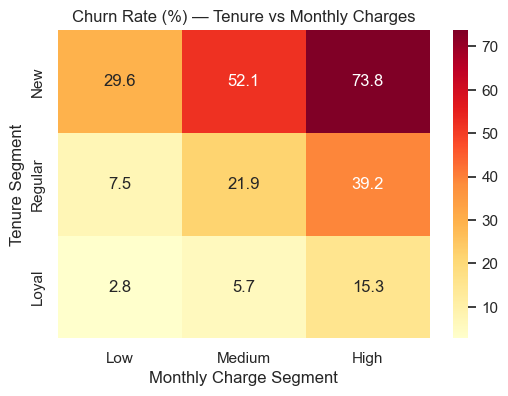

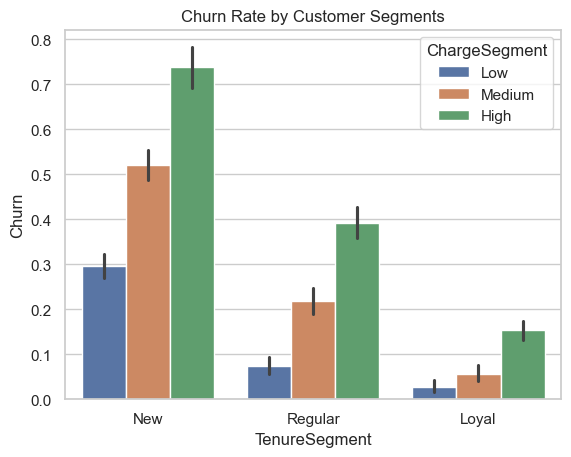

In [10]:
# Heatmap for churn rates
plt.figure(figsize=(6,4))
sns.heatmap(segment_churn, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title('Churn Rate (%) — Tenure vs Monthly Charges')
plt.xlabel('Monthly Charge Segment')
plt.ylabel('Tenure Segment')
plt.show()

# simple bar chart
sns.barplot(x='TenureSegment', y='Churn', data=df, hue='ChargeSegment')
plt.title('Churn Rate by Customer Segments')
plt.show()
